In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,recall_score,precision_score

# 1. Dataset

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./cifar10/', train=True,
                                        download=True, transform=transform)


trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./cifar10/', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


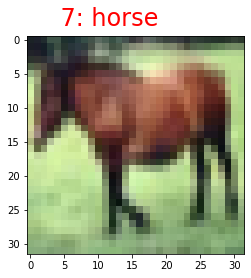

In [29]:
def showeach(data):
  img = data[0] / 2 + 0.5    
  npimg = img.numpy() 
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.text(0,-2,'%5s: %5s' % (data[1],classes[data[1]]), fontsize = 24, color = 'red')
  plt.show()

showeach(trainset[7])

In [4]:
X_train = []
X_test = []
y_train = []
y_test = []
n_features = 3*32*32 #
for i in range(len(trainset)):
  X_train.append(trainset[i][0].numpy().reshape(n_features))
  y_train.append(trainset[i][1])

for i in range(len(testset)):
  X_test.append(testset[i][0].numpy().reshape(n_features))
  y_test.append(testset[i][1])


In [124]:
n_features

3072

In [5]:
### PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
X_train_PCA = pca.fit_transform(np.array(X_train))
X_test_PCA = pca.fit_transform(np.array(X_test))

In [35]:
X_train[0]

array([-0.5372549 , -0.6627451 , -0.60784316, ...,  0.09803927,
       -0.34117645, -0.4352941 ], dtype=float32)

In [6]:
### Random Forest:
from sklearn.ensemble import RandomForestClassifier

RF_clf_pca = RandomForestClassifier(n_estimators=10,max_features=50, max_depth=None,min_samples_split=2, bootstrap=True)

### with PCA
RF_clf_pca.fit(X_train_PCA, y_train)
y_pred = RF_clf_pca.predict(X_train_PCA)
print("The accuracy of training set with PCA using Random Forest Classifier is %.4f%%"%(accuracy_score(y_pred, y_train)*100))
y_pred_ = RF_clf_pca.predict(X_test_PCA)
print("The accuracy of testing set with PCA using Random Forest Classifier is %.4f%%"%(accuracy_score(y_pred_, y_test)*100))

The accuracy of training set with PCA using Random Forest Classifier is 99.2660%
The accuracy of testing set with PCA using Random Forest Classifier is 20.4100%


In [7]:
### Random Forest without PCA
RF_clf = RandomForestClassifier(n_estimators=10,max_features=1000, max_depth=None,min_samples_split=2, bootstrap=True)
RF_clf.fit(X_train, y_train)

y_pred = RF_clf.predict(X_train)
print("The accuracy of training set without PCA using Random Forest Classifier is %.4f%%"%(accuracy_score(y_pred, y_train)*100))

y_pred_ = RF_clf.predict(X_test)
print("The accuracy of testing set without PCA using Random Forest Classifier is %.4f%%"%(accuracy_score(y_pred_, y_test)*100))

The accuracy of training set without PCA using Random Forest Classifier is 99.3440%
The accuracy of testing set without PCA using Random Forest Classifier is 37.0200%


In [8]:
### SVM Classifier
from sklearn.svm import SVC
SVM_clf_pca = SVC(kernel = 'poly')

### with PCA
SVM_clf_pca.fit(X_train_PCA, y_train)
y_pred = SVM_clf_pca.predict(X_train_PCA)
print("The accuracy of training set with PCA using SVM Classifier is %.4f%%"%(accuracy_score(y_pred, y_train)*100))

y_pred_ = SVM_clf_pca.predict(X_test_PCA)
print("The accuracy of testing set with PCA using SVM Classifier is %.4f%%"%(accuracy_score(y_pred_, y_test)*100))

The accuracy of training set with PCA using SVM Classifier is 63.6280%
The accuracy of testing set with PCA using SVM Classifier is 20.1300%


In [9]:
### SVM without PCA
SVM_clf = SVC(kernel = 'poly')
SVM_clf.fit(X_train, y_train)
y_pred = SVM_clf.predict(X_train)
print("The accuracy of training set without PCA using SVM Classifier is %.4f%%"%(accuracy_score(y_pred, y_train)*100))

y_pred_ = SVM_clf.predict(X_test)
print("The accuracy of testing set without PCA using SVM Classifier is %.4f%%"%(accuracy_score(y_pred_, y_test)*100))

The accuracy of training set without PCA using SVM Classifier is 70.2000%
The accuracy of testing set without PCA using SVM Classifier is 46.2100%


In [10]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
LR_clf_pca = LogisticRegression(
    penalty="l2", C=1.0, random_state=None, solver="lbfgs", max_iter=3000,
    multi_class='ovr', verbose=0,
)
### with PCA
LR_clf_pca.fit(X_train_PCA, y_train)
y_pred = LR_clf_pca.predict(X_train_PCA)
print("The accuracy of training set with PCA using Logistic Regression Classifier is %.4f%%"%(accuracy_score(y_pred, y_train)*100))

y_pred_ = LR_clf_pca.predict(X_test_PCA)
print("The accuracy of testing set with PCA using Logistic Regression Classifier is %.4f%%"%(accuracy_score(y_pred_, y_test)*100))

The accuracy of training set with PCA using Logistic Regression Classifier is 40.4000%
The accuracy of testing set with PCA using Logistic Regression Classifier is 20.1600%


In [11]:
### Logistic Regression without PCA
LR_clf = LogisticRegression(
    penalty="l2", C=1.0, random_state=None, solver="lbfgs", max_iter=3000,
    multi_class='ovr', verbose=0,
)

LR_clf.fit(X_train, y_train)
y_pred = LR_clf.predict(X_train)
print("The accuracy of training set without PCA using Logistic Regression Classifier is %.4f%%"%(accuracy_score(y_pred, y_train)*100))

y_pred_ = LR_clf.predict(X_test)
print("The accuracy of testing set with PCA using Logistic Regression Classifier is %.4f%%"%(accuracy_score(y_pred_, y_test)*100))

The accuracy of training set without PCA using Logistic Regression Classifier is 50.9600%
The accuracy of testing set with PCA using Logistic Regression Classifier is 38.0100%


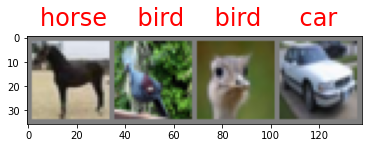

In [89]:
def imshow(img, labels):
    img = img / 2 + 0.5    
    npimg = img.numpy() 
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.text(5, -5, '   '.join('%5s' % classes[labels[j]] for j in range(batch_size)), 
             fontsize = 24, color = 'red')
    plt.show()


dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images), labels)

# 2. Train Classifier

In [7]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) 
        self.pool = nn.MaxPool2d(2, 2) 
        self.conv2 = nn.Conv2d(6, 16, 5) 
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120) 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)
PATH = './cifar_net_untrained.pth'
torch.save(net.state_dict(), PATH)

#
for param in net.parameters():
    print(type(param), param.size())

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
<class 'torch.nn.parameter.Parameter'> torch.Size([6, 3, 5, 5])
<class 'torch.nn.parameter.Parameter'> torch.Size([6])
<class 'torch.nn.parameter.Parameter'> torch.Size([16, 6, 5, 5])
<class 'torch.nn.parameter.Parameter'> torch.Size([16])
<class 'torch.nn.parameter.Parameter'> torch.Size([120, 400])
<class 'torch.nn.parameter.Parameter'> torch.Size([120])
<class 'torch.nn.parameter.Parameter'> torch.Size([84, 120])
<class 'torch.nn.parameter.Parameter'> torch.Size([84])
<class 'torch.nn.parameter.Parameter'> torch.Size([10, 84])
<class 'torch.nn.parameter.Parameter'> torch.Size([10])


# 2a. Create the Network

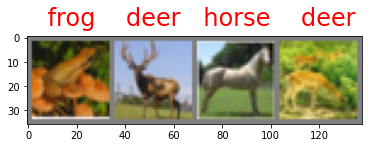

Output Size = torch.Size([4, 10])
Predicted:   deer  frog  frog  frog


In [8]:
dataiter = iter(trainloader)
mb_imgs, mb_labels = dataiter.next()
imshow(torchvision.utils.make_grid(mb_imgs), mb_labels)

mb_outputs = net(mb_imgs)
print("Output Size = " + str(mb_outputs.shape))
_, predicted = torch.max(mb_outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

# 2b. Train the Network

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2): 
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
       
        inputs, labels = data

       
        optimizer.zero_grad()

       
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

       
        running_loss += loss.item()
        if i % 2000 == 1999:    
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.204
[1,  4000] loss: 1.854
[1,  6000] loss: 1.679
[1,  8000] loss: 1.560
[1, 10000] loss: 1.498
[1, 12000] loss: 1.460
[2,  2000] loss: 1.394
[2,  4000] loss: 1.376
[2,  6000] loss: 1.309
[2,  8000] loss: 1.309
[2, 10000] loss: 1.280
[2, 12000] loss: 1.283
Finished Training


In [10]:
print('GroundTruth: ', ' '.join('%5s' % classes[mb_labels[j]] for j in range(4)))
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


mb_outputs_new = net(mb_imgs)
_, predicted_new = torch.max(mb_outputs_new, 1)
print('Predicted New: ', ' '.join('%5s' % classes[predicted_new[j]]
                              for j in range(4)))

GroundTruth:   frog  deer horse  deer
Predicted:   deer  frog  frog  frog
Predicted New:   frog  bird horse  deer


# 2c. Run on new minibatch

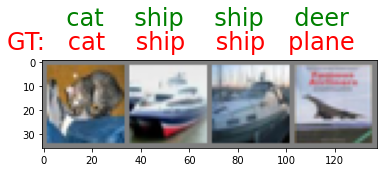

Predicted:    cat  ship  ship  deer


In [11]:
def imshow_pred(img, labels, pred):
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.text(3, -15, '   '.join('%5s' % classes[pred[j]] for j in range(batch_size)), 
             fontsize = 24, color = 'green')
    plt.text(-15, -5, 'GT: ' + '   '.join('%5s' % classes[labels[j]] for j in range(batch_size)), 
             fontsize = 24, color = 'red')
    plt.show()
    
PATH = './cifar_net_2epoch.pth'
torch.save(net.state_dict(), PATH)
net = Net()
net.load_state_dict(torch.load(PATH))


dataiter = iter(testloader)
test_images, test_labels = dataiter.next()
test_outputs = net(test_images)
_, predicted_test = torch.max(test_outputs, 1)
imshow_pred(torchvision.utils.make_grid(test_images), test_labels, predicted_test)
print('Predicted: ', ' '.join('%5s' % classes[predicted_test[j]]
                              for j in range(4)))

In [12]:
def evalNetwork(network):
    correct = 0
    total = 0
    
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = network(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))

evalNetwork(net)

Accuracy of the network on the 10000 test images: 55 %


In [13]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class plane is: 60.2 %
Accuracy for class car   is: 50.3 %
Accuracy for class bird  is: 34.8 %
Accuracy for class cat   is: 32.0 %
Accuracy for class deer  is: 59.5 %
Accuracy for class dog   is: 34.1 %
Accuracy for class frog  is: 78.9 %
Accuracy for class horse is: 60.3 %
Accuracy for class ship  is: 73.5 %
Accuracy for class truck is: 67.9 %


# 3. Global Average Pooling

In [38]:
class GAPNet(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 6, 5) 
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 10, 5) 
        self.gap = nn.AvgPool2d(10)
        self.fc = nn.Linear(10, 10) 

    def forward(self, x):
        
        x = self.pool(F.relu(self.conv1(x)))
        x = self.gap(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) 
        x = F.relu(self.fc(x))
        return x

gapnet = GAPNet()
print(gapnet)

GAPNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 10, kernel_size=(5, 5), stride=(1, 1))
  (gap): AvgPool2d(kernel_size=10, stride=10, padding=0)
  (fc): Linear(in_features=10, out_features=10, bias=True)
)


In [39]:
gapnet = GAPNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(gapnet.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2): 
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = gapnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:    
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.297
[1,  4000] loss: 2.281
[1,  6000] loss: 2.237
[1,  8000] loss: 2.148
[1, 10000] loss: 2.121
[1, 12000] loss: 2.115
[2,  2000] loss: 2.095
[2,  4000] loss: 2.097
[2,  6000] loss: 2.081
[2,  8000] loss: 2.085
[2, 10000] loss: 2.052
[2, 12000] loss: 2.035
Finished Training


In [40]:
evalNetwork(gapnet)

NameError: name 'evalNetwork' is not defined

# 6.1 Backbones

In [ ]:
from torchvision import models

resnet18 = models.resnet18(pretrained=True)
print(resnet18)

evalNetwork(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# 4. Transfer Learning

In [15]:
num_ftrs = resnet18.fc.in_features

for param in resnet18.parameters():
    param.requires_grad = False

resnet18.fc = nn.Linear(num_ftrs, 10)

for name, param in resnet18.named_parameters():
    print(name, param.requires_grad)

criterion = nn.CrossEntropyLoss()

optimizer_transfer_learning = optim.SGD(filter(lambda p: p.requires_grad, resnet18.parameters()), lr=0.001, momentum=0.9)


conv1.weight False
bn1.weight False
bn1.bias False
layer1.0.conv1.weight False
layer1.0.bn1.weight False
layer1.0.bn1.bias False
layer1.0.conv2.weight False
layer1.0.bn2.weight False
layer1.0.bn2.bias False
layer1.1.conv1.weight False
layer1.1.bn1.weight False
layer1.1.bn1.bias False
layer1.1.conv2.weight False
layer1.1.bn2.weight False
layer1.1.bn2.bias False
layer2.0.conv1.weight False
layer2.0.bn1.weight False
layer2.0.bn1.bias False
layer2.0.conv2.weight False
layer2.0.bn2.weight False
layer2.0.bn2.bias False
layer2.0.downsample.0.weight False
layer2.0.downsample.1.weight False
layer2.0.downsample.1.bias False
layer2.1.conv1.weight False
layer2.1.bn1.weight False
layer2.1.bn1.bias False
layer2.1.conv2.weight False
layer2.1.bn2.weight False
layer2.1.bn2.bias False
layer3.0.conv1.weight False
layer3.0.bn1.weight False
layer3.0.bn1.bias False
layer3.0.conv2.weight False
layer3.0.bn2.weight False
layer3.0.bn2.bias False
layer3.0.downsample.0.weight False
layer3.0.downsample.1.weight Fa

In [16]:
for epoch in range(2):  
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer_transfer_learning.zero_grad()

        outputs = resnet18(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_transfer_learning.step()


        running_loss += loss.item()
        if i % 2000 == 1999:    
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.583
[1,  4000] loss: 2.604
[1,  6000] loss: 2.558
[1,  8000] loss: 2.634
[1, 10000] loss: 2.608
[1, 12000] loss: 2.630
[2,  2000] loss: 2.620
[2,  4000] loss: 2.611
[2,  6000] loss: 2.623
[2,  8000] loss: 2.605
[2, 10000] loss: 2.613
[2, 12000] loss: 2.618
Finished Training


In [17]:
PATH = './cifar_net_resnet18_transferlearning.pth'
torch.save(resnet18.state_dict(), PATH)
evalNetwork(resnet18)

Accuracy of the network on the 10000 test images: 28 %


# 5. Optimization

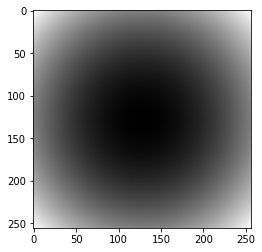

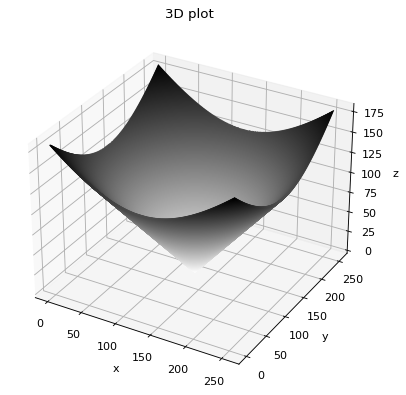

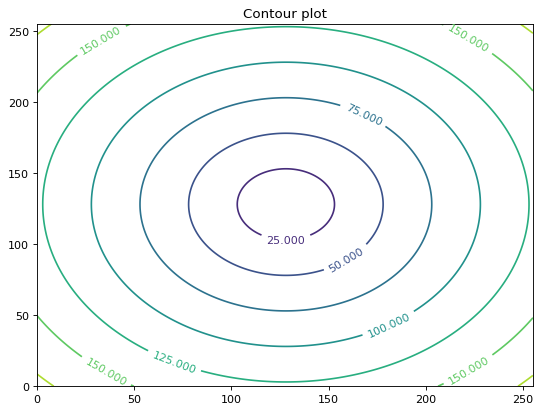

In [18]:

def constructParaboloid(w,h):
    img = np.zeros((w,h), np.float32)
    for x in range (w):
        for y in range (h):
            img[y,x] = (x-w/2)**2 + (y-h/2)**2
    return img

def visualizeParaboloid(w,h):
    x = np.arange(0, w, 1)
    y = np.arange(0, h, 1)
    X, Y = np.meshgrid(x, y)
    Z = np.sqrt((X-128)**2 + (Y-128)**2)  
    
    fig = plt.figure(figsize=(8, 6), dpi=80)
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, Z, 500, cmap='binary')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z');
    ax.set_title('3D plot')
    plt.show()
    
    fig = plt.figure(figsize=(8, 6), dpi=80)
    CS = plt.contour(X, Y, Z)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.title('Contour plot')
    plt.show()

w,h = 256,256
prbld = constructParaboloid(w,h)
plt.imshow(prbld, cmap = 'gray')
plt.show()

visualizeParaboloid(w,h)

Gaussian Derivative Kernel: 
tensor([[[[ 0.1250,  0.2500,  0.1250],
          [ 0.0000,  0.0000,  0.0000],
          [-0.1250, -0.2500, -0.1250]]]])
Gaussian Derivative Kernel: 
tensor([[[[ 0.1250,  0.2500,  0.1250],
          [ 0.0000,  0.0000,  0.0000],
          [-0.1250, -0.2500, -0.1250]]]])


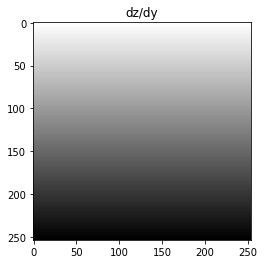

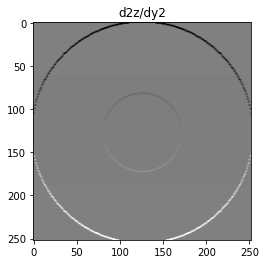

Gaussian Derivative Kernel: 
tensor([[[[ 0.1250,  0.0000, -0.1250],
          [ 0.2500,  0.0000, -0.2500],
          [ 0.1250,  0.0000, -0.1250]]]])
Gaussian Derivative Kernel: 
tensor([[[[ 0.1250,  0.0000, -0.1250],
          [ 0.2500,  0.0000, -0.2500],
          [ 0.1250,  0.0000, -0.1250]]]])


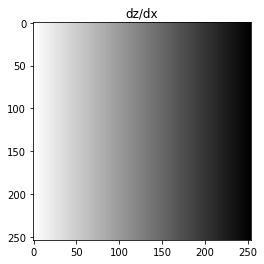

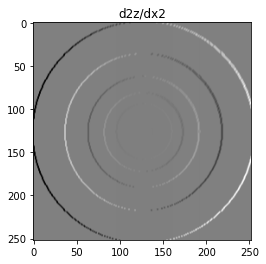

In [19]:
def getYDeriv(img):
    gaussian_1d_blur = np.array([1, 2, 1], dtype=np.float32) * 0.25
    gaussian_1d_diff = np.array([1, 0, -1], dtype=np.float32) * 0.5
    gaussian_2d_deriv = torch.from_numpy(np.outer(gaussian_1d_diff, gaussian_1d_blur.T))
    gaussian_2d_deriv = torch.unsqueeze(gaussian_2d_deriv, 0)
    gaussian_2d_deriv = torch.unsqueeze(gaussian_2d_deriv, 0) 
    print("Gaussian Derivative Kernel: \n" +str(gaussian_2d_deriv))

    
    conv = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3)
    conv.weight.data = gaussian_2d_deriv
    conv.weight.required_grad = False
    
    return conv(img)

def getXDeriv(img):
    gaussian_1d_blur = np.array([1, 2, 1], dtype=np.float32) * 0.25
    gaussian_1d_diff = np.array([1, 0, -1], dtype=np.float32) * 0.5
    gaussian_2d_deriv = torch.from_numpy(np.outer(gaussian_1d_blur, gaussian_1d_diff.T))
    gaussian_2d_deriv = torch.unsqueeze(gaussian_2d_deriv, 0)
    gaussian_2d_deriv = torch.unsqueeze(gaussian_2d_deriv, 0) 
    print("Gaussian Derivative Kernel: \n" +str(gaussian_2d_deriv))

    
    conv = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3)
    conv.weight.data = gaussian_2d_deriv
    conv.weight.required_grad = False
    
    return conv(img)

prbld = torch.from_numpy(prbld)
prbld = prbld.squeeze()
prbld = torch.unsqueeze(prbld, 0)
prbld = torch.unsqueeze(prbld, 0) 


dzdy = getYDeriv(prbld)
d2zdy2 = getYDeriv(dzdy)

dzdy_numpy = dzdy[0].squeeze().detach().numpy()
plt.imshow(dzdy_numpy, cmap='gray')
plt.title("dz/dy")
plt.show()

d2zdy2_numpy = d2zdy2[0].squeeze().detach().numpy()
plt.imshow(d2zdy2_numpy, cmap='gray')
plt.title("d2z/dy2")
plt.show()


dzdx = getXDeriv(prbld)
d2zdx2 = getXDeriv(dzdx)

dzdx_numpy = dzdx[0].squeeze().detach().numpy()
plt.imshow(dzdx_numpy, cmap='gray')
plt.title("dz/dx")
plt.show()

d2zdx2_numpy = d2zdx2[0].squeeze().detach().numpy()
plt.imshow(d2zdx2_numpy, cmap='gray')
plt.title("d2z/dx2")
plt.show()

Newton Starting point: [9, 246], End Point: [126, 126]
SGD Starting point: [9, 246], End Point: [123, 126]
SGD-M Starting point: [9, 246], End Point: [123, 126]


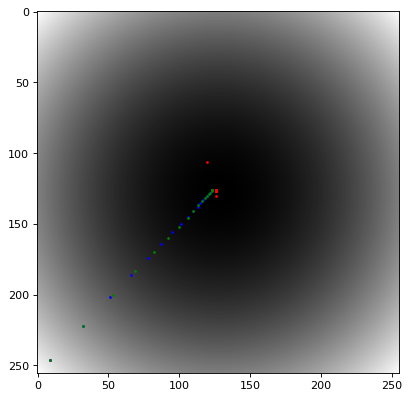

Newton Starting point: [246, 12], End Point: [127, 127]
SGD Starting point: [246, 12], End Point: [127, 122]
SGD-M Starting point: [246, 12], End Point: [126, 123]


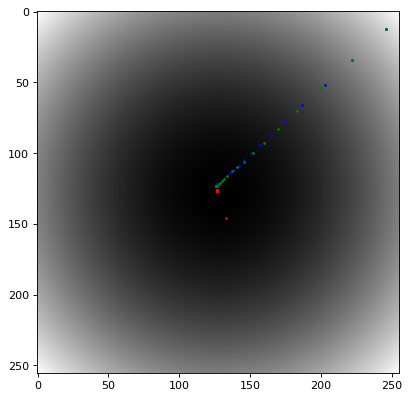

Newton Starting point: [12, 33], End Point: [126, 127]
SGD Starting point: [12, 33], End Point: [123, 122]
SGD-M Starting point: [12, 33], End Point: [123, 123]


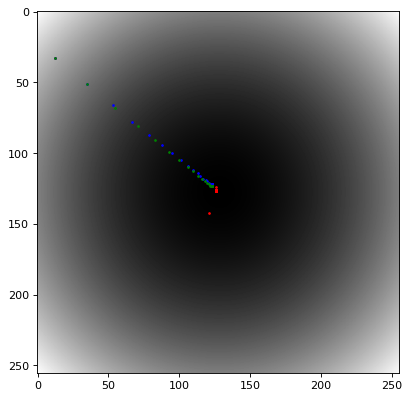

Newton Starting point: [33, 178], End Point: [126, 126]
SGD Starting point: [33, 178], End Point: [123, 126]
SGD-M Starting point: [33, 178], End Point: [123, 126]


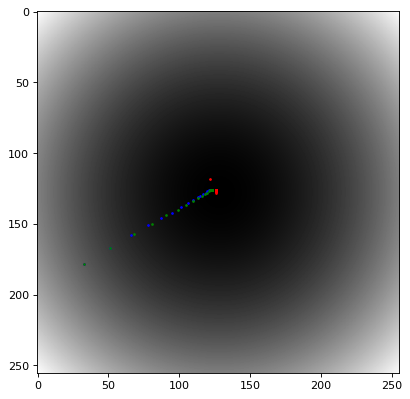

Newton Starting point: [178, 174], End Point: [127, 126]
SGD Starting point: [178, 174], End Point: [127, 126]
SGD-M Starting point: [178, 174], End Point: [126, 126]


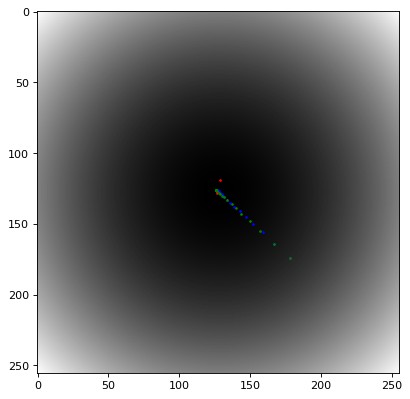

In [20]:
def newtonMethod(x0, y0, epoch):
    point_updates = []
    for i in range(epoch):
        point_updates.append([x0,y0])
        h_x = x0 + (dzdx_numpy[y0,x0]/d2zdx2_numpy[y0,x0])
        h_y = y0 + (dzdy_numpy[y0,x0]/d2zdy2_numpy[y0,x0])
        x0 = int(h_x)
        y0 = int(h_y)
    return point_updates

def SGD(x0, y0, lr, epoch):
    point_updates = []
    for i in range(epoch):
        point_updates.append([x0,y0])
        h_x = x0 + lr* (dzdx_numpy[y0,x0])
        h_y = y0 + lr* (dzdy_numpy[y0,x0])
        x0 = int(h_x)
        y0 = int(h_y)
    return point_updates

def SGDMomentum(x0, y0, lr, epoch, gamma):
    point_updates = []
    v_x,v_y = 0,0
    for i in range(epoch):
        point_updates.append([x0,y0])
        v_x = gamma * v_x + lr * dzdx_numpy[y0,x0]
        v_y = gamma * v_y + lr * dzdy_numpy[y0,x0]
        h_x = x0 + v_x
        h_y = y0 + v_y
        x0 = int(h_x)
        y0 = int(h_y)
    return point_updates

def plotPointUpdates(img, lr, epoch, n_points, plot):

    init_point = np.random.randint(w+1, size=n_points*2)
    for i in range(n_points):
        x0 = init_point[i]
        y0 = init_point[i+1]
        point_updates_newton = newtonMethod(x0, y0, epoch)
        point_updates_SGD = SGD(x0,y0,lr,epoch)
        point_updates_SGD_M = SGDMomentum(x0, y0, lr, epoch, gamma=.1)
        print("Newton Starting point: " + str(point_updates_newton[0]) + ", End Point: " 
              + str(point_updates_newton[epoch-1]))
        print("SGD Starting point: " + str(point_updates_SGD[0]) + ", End Point: " 
              + str(point_updates_SGD[epoch-1]))
        print("SGD-M Starting point: " + str(point_updates_SGD_M[0]) + ", End Point: " 
              + str(point_updates_SGD_M[epoch-1]))

        if(plot):
            plt.figure(figsize=(8, 6), dpi=80)
            plt.scatter([elem[0] for elem in point_updates_newton], 
                        [elem[1] for elem in point_updates_newton], c='r', s =2)
            plt.scatter([elem[0] for elem in point_updates_SGD], 
                        [elem[1] for elem in point_updates_SGD], c='b', s =2)
            plt.scatter([elem[0] for elem in point_updates_SGD_M], 
                        [elem[1] for elem in point_updates_SGD_M], c='g', s =2)
            plt.imshow(img, cmap = 'gray')
            plt.show()
            
prbld = constructParaboloid(w,h)
plotPointUpdates(prbld, lr=0.1, epoch=50, n_points=5, plot=1)

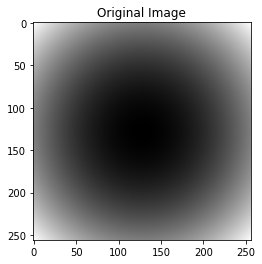

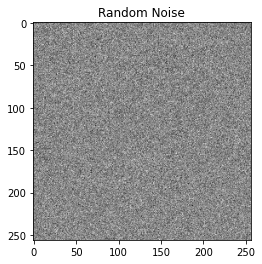

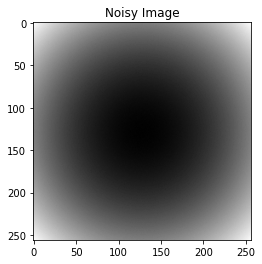

In [21]:
mean = 0.0 
std = 100.0

plt.imshow(prbld, cmap='gray')
plt.title("Original Image")
plt.show()

noise = np.random.normal(mean, std, prbld.shape)
plt.imshow(noise, cmap='gray')
plt.title("Random Noise")
plt.show()

noisy_img = prbld + noise
plt.imshow(noisy_img, cmap='gray')
plt.title("Noisy Image")
plt.show()

In [2]:
plotPointUpdates(noisy_img, lr=0.1, epoch=50, n_points=5, plot=1)

NameError: name 'plotPointUpdates' is not defined